<a href="https://colab.research.google.com/github/youtsumi/ZernikePlot/blob/main/Zernike.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
nth = 4
a=[ [i]*(2*i+1) for i in range(nth)]
N = [item for sublist in a for item in sublist]
b=[ list(range(-i,i+1)) for i in range(nth)]
M = [item for sublist in b for item in sublist]
N, M

([0, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3],
 [0, -1, 0, 1, -2, -1, 0, 1, 2, -3, -2, -1, 0, 1, 2, 3])

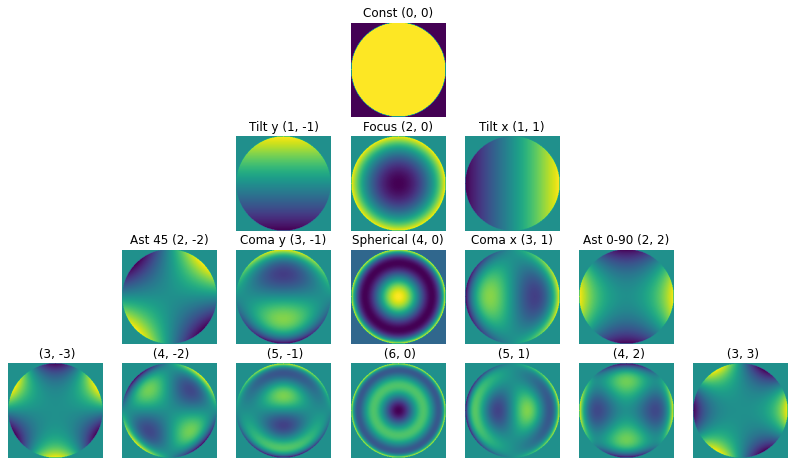

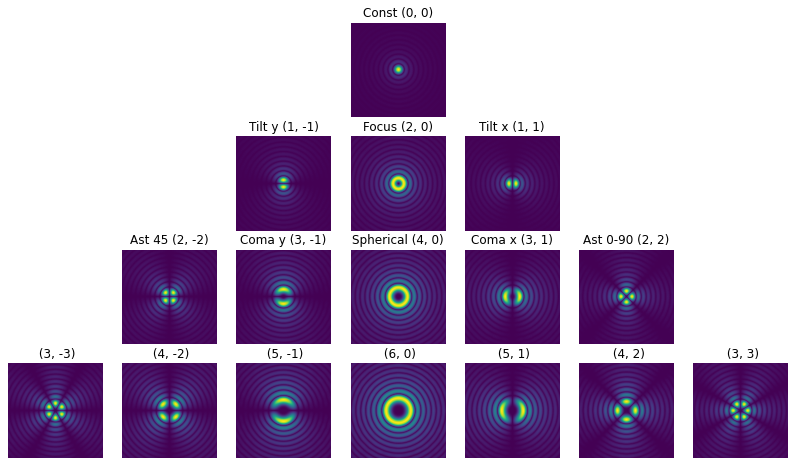

/usr/local/lib/python3.7/dist-packages/matplotlib/quiver.py:715: RuntimeWarning: divide by zero encountered in double_scalars
  length = a * (widthu_per_lenu / (self.scale * self.width))
/usr/local/lib/python3.7/dist-packages/matplotlib/quiver.py:715: RuntimeWarning: invalid value encountered in multiply
  length = a * (widthu_per_lenu / (self.scale * self.width))


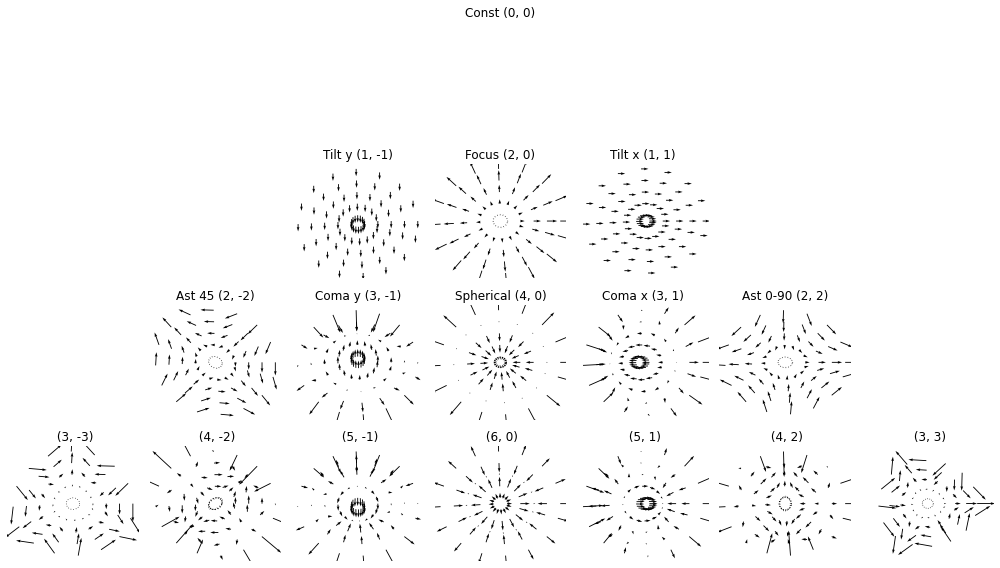

In [2]:
import numpy
from scipy.special import factorial as fact
from numpy import exp, cos, sin, pi, sqrt, arctan2, fabs, ceil, floor, real, absolute
import pylab
from scipy.fft import rfft2, irfft2
from matplotlib.colors import LogNorm
from scipy.ndimage import gaussian_filter

order=[
  (0,0,"Const"),

  (1,-1,"Tilt y"),
  (2,0,"Focus"),
  (1,1,"Tilt x"),

  (2,-2,"Ast 45"),
  (3,-1,"Coma y"),
  (4,0,"Spherical"),
  (3,1,"Coma x"),
  (2,2,"Ast 0-90"),

  (3,-3,""),
  (4,-2,""),
  (5,-1,""),
  (6,0,""),
  (5,1,""),
  (4,2,""),
  (3,3,"")
	    ]

def Z_r(n,m,r):
    z_r=numpy.sum(
	[ numpy.power(-1.,k)*fact(n-k)*numpy.power(r,n-2.*k) / ( fact(k)*fact((n+m)/2.-k)*fact((n-m)/2.-k))
	for k in numpy.arange(0, (n-m)/2+1)  ],
	axis=0)
    return numpy.array(z_r,dtype=numpy.float64)

def Z_xy(n,m,x,y):
    r = sqrt(x**2+y**2)
    th = arctan2(y,x)
    if m>=0:
        zr=Z_r(n,fabs(m),r)*cos(m*th)
    else:
        zr=Z_r(n,fabs(m),r)*sin(m*th)
    zr[numpy.where(r>1.)]=0 # numpy.nan
    return zr

def showZernikeEigen():
    figs, axs = pylab.subplots(4, 7, figsize=(14,8), facecolor="white")
    for i,(n,m,name) in enumerate( order ):
      ax=axs[N[i]][M[i]+3]
      ax.set_title(f"{name} ({n}, {m})")
      x=numpy.arange(-1,1.01,0.01)
      y=numpy.arange(-1,1.01,0.01)
      X,Y=numpy.meshgrid(x,y)
      zr = Z_xy(n,m,X,Y)
      ax.imshow(zr,extent=[-1,1,-1,1])
    for ax in axs.flatten():
      ax.axis('off')
    pylab.show()

def showFourierZernikeEigen():
    figs, axs = pylab.subplots(4, 7, figsize=(14,8), facecolor="white")
    for i,(n,m,name) in enumerate( order ):
      ax=axs[N[i]][M[i]+3]
      ax.set_title(f"{name} ({n}, {m})")
      x=numpy.arange(-10,10.01,0.01)
      y=numpy.arange(-10,10.01,0.01)
      X,Y=numpy.meshgrid(x,y)
      zr = Z_xy(n,m,X,Y) # *numpy.sum([ Z_xy(n,m,X,Y) for (n,m,name) in order ],axis=0)
      f_uv = numpy.fft.fft2(zr)
      shifted_f_uv = numpy.fft.fftshift(f_uv)
      Fzr= absolute(shifted_f_uv)
      ax.imshow(gaussian_filter(Fzr,sigma=.01),extent=[-1,1,-1,1])
      ax.set_xlim(-.1,.1)
      ax.set_ylim(-.1,.1)      
    for ax in axs.flatten():
      ax.axis('off')
    pylab.show()

def showdiff():
    figs, axs = pylab.subplots(4, 7, figsize=(14,8), facecolor="white")
    for i,(n,m,name) in enumerate( order ):
      ax=axs[N[i]][M[i]+3]
      ax.set_title(f"{name} ({n}, {m})")
      ax.quiver(*diff(n,m))
      pylab.xlim(-1.2,1.2)
      pylab.ylim(-1.2,1.2)
    for ax in axs.flatten():
      ax.axis('off')

    pylab.tight_layout()
    pylab.show()

def diff(n,m):
    dx=1e-6
    dy=1e-6
    r = numpy.arange(0.1,1,0.2)
    th = numpy.arange(0,2*pi,0.4)
    x = numpy.outer(r,cos(th))
    y = numpy.outer(r,sin(th))
    Dx=(Z_xy(n,m,x+0.5*dx,y)-Z_xy(n,m,x-0.5*dx,y))/dx
    Dy=(Z_xy(n,m,x,y+0.5*dy)-Z_xy(n,m,x,y-0.5*dy))/dy
    return (x,y,Dx,Dy)

if __name__ == "__main__":
    showZernikeEigen()
    showFourierZernikeEigen()
    showdiff()

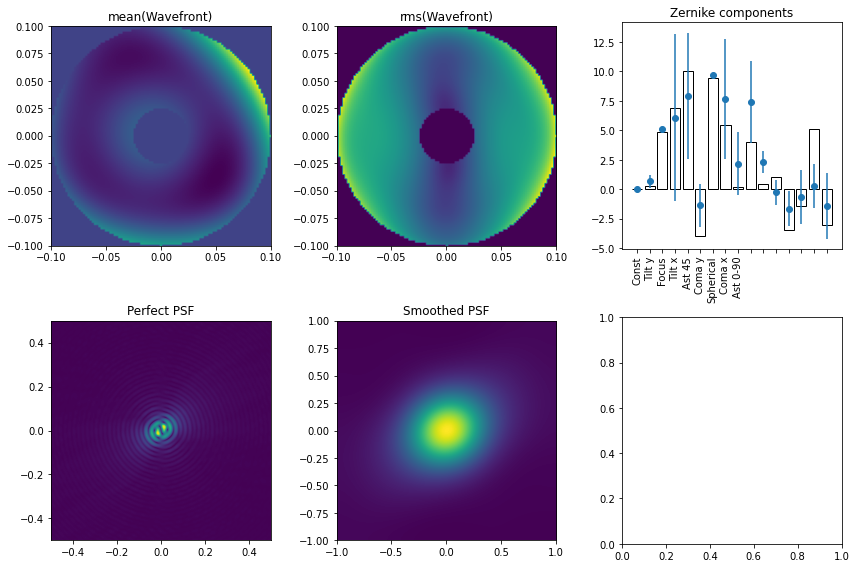

In [3]:
figs, axs = pylab.subplots(2, 3, figsize=(12,8), facecolor="white")

x=numpy.arange(-10,10.02,0.02)
y=numpy.arange(-10,10.02,0.02)
X,Y=numpy.meshgrid(x,y)

#nthorder=9
nthorder=16
#w=numpy.random.normal(size=nthorder)
#w[10:]*=1/10
#w[:4]*=1/10
#w[6]=4 # spherical
#w[5]=5 # coma 7
#w[7]=5 # coma x
#w[2]=-3 # defocus
#   (0,0,"Const"),

#  (1,-1,"Tilt y"),
#  (2,0,"Focus"),
#  (1,1,"Tilt x"),

#  (2,-2,"Ast 45"),
#  (3,-1,"Coma y"),
#  (4,0,"Spherical"),
#  (3,1,"Coma x"),
#  (2,2,"Ast 0-90"),

#  (3,-3,""),
#  (4,-2,""),
#  (5,-1,""),
#  (6,0,""),
#  (5,1,""),
#  (4,2,""),
#  (3,3,"")
wbas = [ 0, 0.662, 5.098, 6.074, 7.910, -1.377, 9.679, 7.645, 2.157, 7.379, 2.310, -0.275, -1.651, -0.664, 0.303 , -1.424]
wstd = [ 0, 0.561, 0.155, 7.106, 5.374,  1.805, 0.135, 5.074, 2.672, 3.476, 0.955,  1.063,  1.503,  2.252, 1.866 , 2.777 ]

Img=[]
for i in range(100):
  w=numpy.random.normal(wbas,wstd)
  base=[ Z_xy(n,m,X,Y)*w[i] for i, (n,m,name) in enumerate(order[:nthorder]) ]
  img = numpy.sum(base,axis=0)
  img[numpy.where(X**2+Y**2<0.25**2)]=0
  Img.append(img)

ax=axs[0][0]
ax.imshow(numpy.mean(Img,axis=0),extent=[-1,1,-1,1])
ax.set_title("mean(Wavefront)")
ax.set_xlim(-.1,.1)
ax.set_ylim(-.1,.1)

ax=axs[0][1]
ax.imshow(numpy.std(Img,axis=0),extent=[-1,1,-1,1])
ax.set_title("rms(Wavefront)")
ax.set_xlim(-.1,.1)
ax.set_ylim(-.1,.1)

ax=axs[0][2]
ax.errorbar(range(nthorder),wbas,yerr=wstd,fmt="o")
ax.bar(range(nthorder),w,color="none",edgecolor="black")
ax.set_xticks(range(nthorder))
ax.set_xticklabels( [ name for (n,m,name) in order[:nthorder] ], rotation=90 )
ax.set_title("Zernike components")

bx=axs[1][0]
f_uv = numpy.fft.fft2(img)
shifted_f_uv = numpy.fft.fftshift(f_uv)
Fzr= absolute(shifted_f_uv)
bx.imshow(Fzr,extent=[-1,1,-1,1])
bx.set_xlim(-0.5,0.5)
bx.set_ylim(-0.5,0.5)
bx.set_title("Perfect PSF")

bx=axs[1][1]
bx.imshow(gaussian_filter(Fzr,sigma=100),extent=[-1,1,-1,1])
bx.set_xlim(-1,1)
bx.set_ylim(-1,1)
bx.set_title("Smoothed PSF")

pylab.tight_layout()
pylab.show()